
SFFF
FHFH
FFFH
HFFG
Episode 90/100.defaultdict(<function politique_optimale_Q.<locals>.<lambda> at 0x000001B82C846948>, {0: array([0., 0., 0., 0.]), 4: array([0., 0., 0., 0.]), 5: array([0., 0., 0., 0.]), 1: array([0., 0., 0., 0.]), 8: array([0., 0., 0., 0.]), 9: array([0., 0., 0., 0.]), 12: array([0., 0., 0., 0.]), 10: array([0., 0., 0., 0.]), 2: array([0., 0., 0., 0.]), 13: array([0., 0., 0., 0.])})


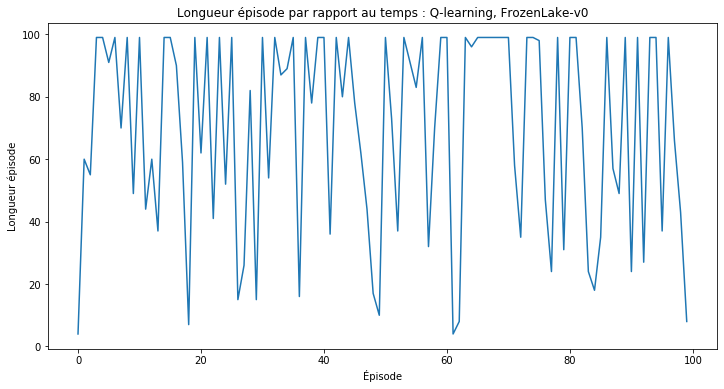

In [6]:
%matplotlib inline
# -*- coding: utf-8 -*-
"""
Optimisation de politique avec méthode Q-learning
Politique epsilon-vorace
Environnement FrozenLake-v0 
"""
import gym
from gym import spaces
from gym.utils import seeding
import numpy as np
from collections import defaultdict
import itertools
import sys
from gym.envs.toy_text import discrete

import matplotlib
from matplotlib import pyplot as plt

def afficher_statistiques(longueur_episode):
    """
    Afficher l'évolution des longueurs d'épisodes avec le temps
    """
    figure1 = plt.figure(figsize=(12,6))
    plt.plot(longueur_episode)
    plt.xlabel("Épisode")
    plt.ylabel("Longueur épisode")
    plt.title("Longueur épisode par rapport au temps : Q-learning, FrozenLake-v0")

def politique_optimale_Q(env, nombre_episodes, gamma=1.0, alpha= 0.1, epsilon=0.1):
    """
    Prédire la valeur de la politique par la méthode Q
        politique: fonction pi
        env: environnement de type OpenAI gym
        nombre_episodes: nombre d'épisodes générés pour les estimations
        gamma: facteur d'escompte des récompenses futures
    Retour:
        V: Dictionnaire(etat,valeur)
    """

    longueur_episode = np.zeros(nombre_episodes)
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    for i_episode in range(nombre_episodes):
        if i_episode % 10 == 0:
            print("\rEpisode {}/{}.".format(i_episode, nombre_episodes), end="")
            sys.stdout.flush()

         # Un episode est un tableau de tuples (etat, action, recompense)
        etat = env.reset()
        for t in itertools.count():
            
            # Choisir action selon politique e-vorace
            probabilites_actions = np.ones(env.action_space.n, dtype=float) * epsilon / env.action_space.n
            meilleure_action = np.argmax(Q[etat])
            probabilites_actions[meilleure_action] += (1.0 - epsilon)
            action = np.random.choice(np.arange(len(probabilites_actions)), p=probabilites_actions)
            
            etat_suivant, recompense, final, _ = env.step(action)

            meilleure_action_suivante = np.argmax(Q[etat_suivant])
            cible = recompense+gamma*Q[etat_suivant][meilleure_action_suivante]
            delta = cible-Q[etat][action]
            # print(cible, delta)
            Q[etat][action] += alpha*delta
            
            if final:
                longueur_episode[i_episode] = t
                break
            etat = etat_suivant
    return Q,longueur_episode

env = gym.make("FrozenLake-v0",is_slippery=False)
env.seed(0)
env.render()

Q,longueur_episode = politique_optimale_Q(env, nombre_episodes=100,gamma=0.95,alpha=0.8,epsilon=0.1)
afficher_statistiques(longueur_episode)
print(Q)

In [4]:
""" Test du jeu après optimisation de Q """
nb_episodes = 3
max_etapes = 99 
env.reset()
recompenses = []

for episode in range(nb_episodes):
    etat = env.reset()
    final = False
    total_recompenses = 0
    print("**********************************")
    print("Épisode : ", episode)

    for etape in range(max_etapes):
        env.render()
        action = np.argmax(Q[etat])
        
        etat_suivant, recompense, final, _ = env.step(action)
        
        total_recompenses += recompense
        
        if final:
            recompenses.append(total_recompenses)
            print ("Total des récompenses de l'épisode", total_recompenses)
            break
        etat = etat_suivant
env.close()
print ("Moyenne de récompenses par épisode: " +  str(sum(recompenses)/nb_episodes))

**********************************
Épisode :  0

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (

In [5]:
Q

defaultdict(<function __main__.politique_optimale_Q.<locals>.<lambda>()>,
            {0: array([0., 0., 0., 0.]),
             4: array([0., 0., 0., 0.]),
             8: array([0., 0., 0., 0.]),
             12: array([0., 0., 0., 0.]),
             1: array([0., 0., 0., 0.]),
             5: array([0., 0., 0., 0.]),
             9: array([0., 0., 0., 0.]),
             10: array([0., 0., 0., 0.]),
             13: array([0., 0., 0., 0.]),
             2: array([0., 0., 0., 0.]),
             6: array([0., 0., 0., 0.]),
             3: array([0., 0., 0., 0.]),
             14: array([0., 0., 0., 0.]),
             11: array([0., 0., 0., 0.])})

In [42]:
longueur_episode

array([26.,  4.,  5., ..., 14.,  1., 14.])